<a href="https://colab.research.google.com/github/Sankalpmahanta/Housepriceproject/blob/main/HousePricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **NAME** : SANKALPA MAHANTA

 **DATA SCIENCE INTERSHIP**@Coding Samurai

 **Project Title** : Predicting House Prices                                       
**Project Description** : Build a simple machine learning model to predict house prices
based on various features such as square footage, number of bedrooms, neighborhood,
and more. This project will introduce you to regression analysis, which is a fundamental
concept in data science.

In [2]:
# Importing the necessary libraries:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [3]:
# Connecting google drive :
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# reading the data
house_price_dataset = pd.read_csv('/content/drive/MyDrive/CODING SAMURAI/HousingPrices-Amsterdam-August-2021.csv')
house_price_dataset

,Unnamed: 0,Address,Zip,Price,Area,Room,Lon,Lat
0,1,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
1,2,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
2,3,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
3,4,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
4,5,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538
...,...,...,...,...,...,...,...,...
919,920,"Ringdijk, Amsterdam",1097 AE,750000.0,117,1,4.927757,52.354173
920,921,"Kleine Beerstraat 31, Amsterdam",1033 CP,350000.0,72,3,4.890612,52.414587
921,922,"Stuyvesantstraat 33 II, Amsterdam",1058 AK,350000.0,51,3,4.856935,52.363256
922,923,"John Blankensteinstraat 51, Amsterdam",1095 MB,599000.0,113,4,4.965731,52.375268


In [5]:
# Checking the dimensions of the dataset
house_price_dataset.shape

(924, 8)

In [6]:
house_price_dataset.head()

,Unnamed: 0,Address,Zip,Price,Area,Room,Lon,Lat
0,1,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
1,2,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
2,3,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
3,4,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
4,5,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538


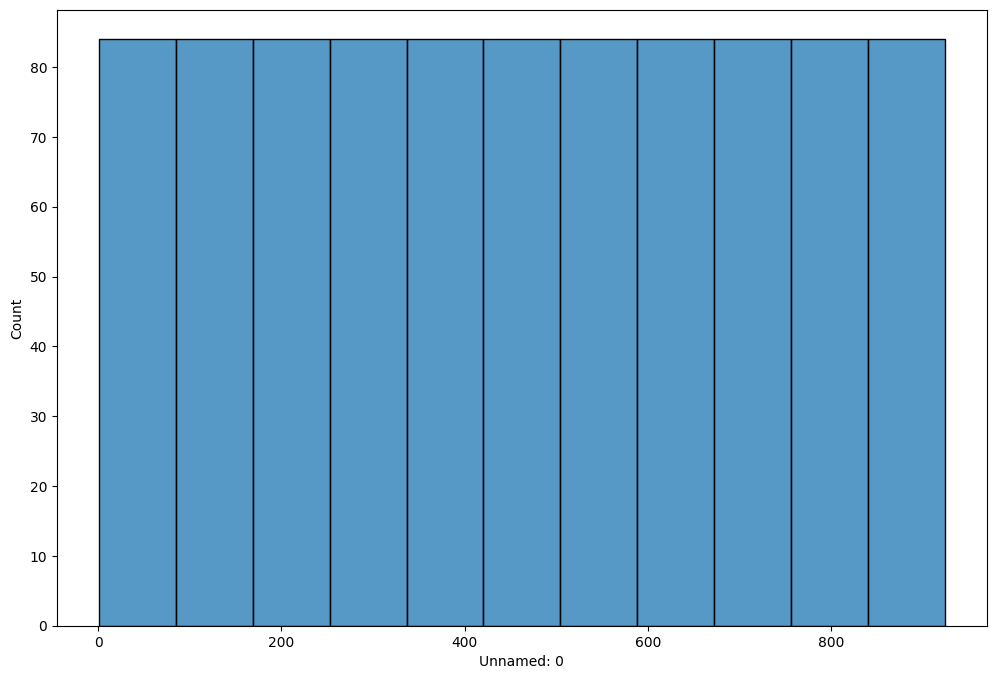

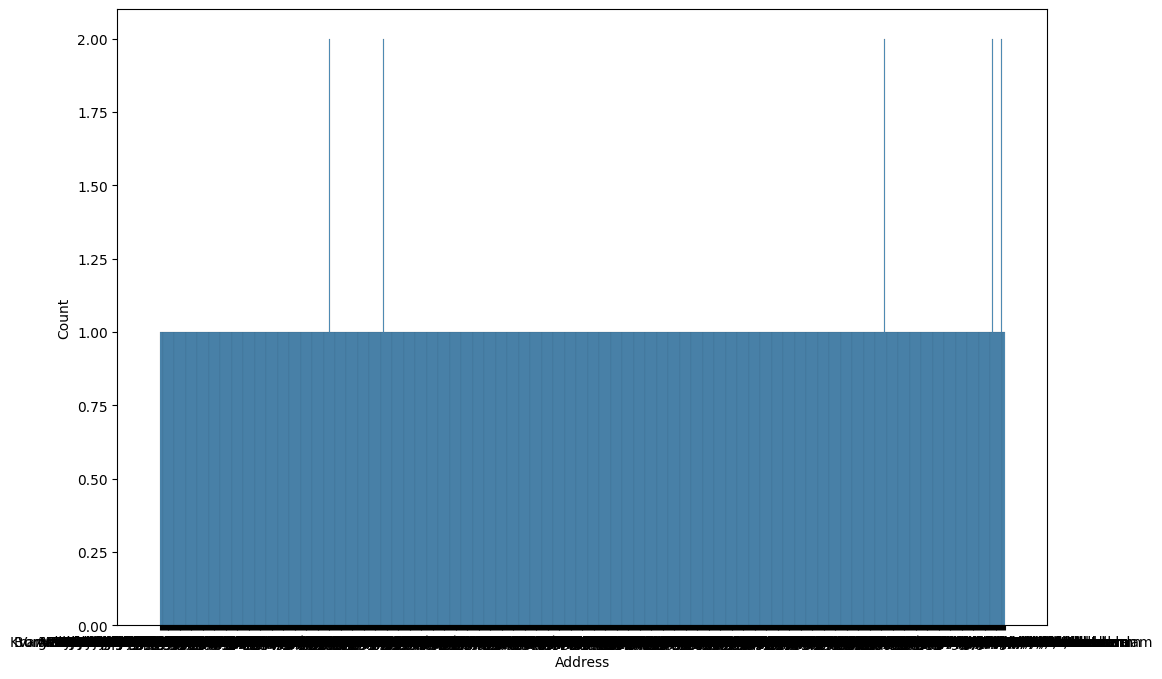

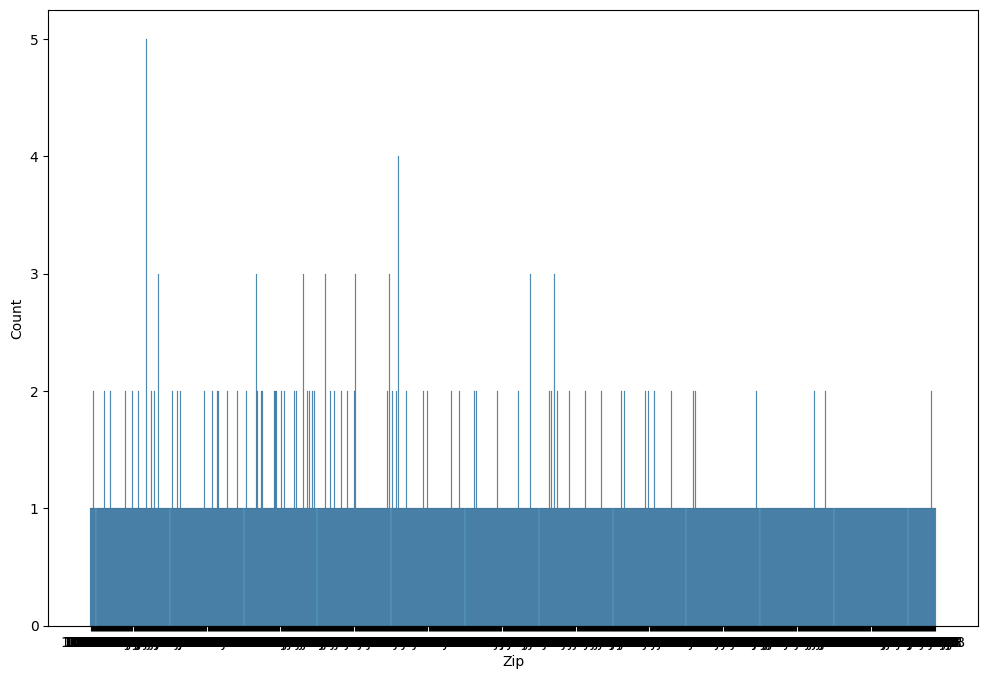

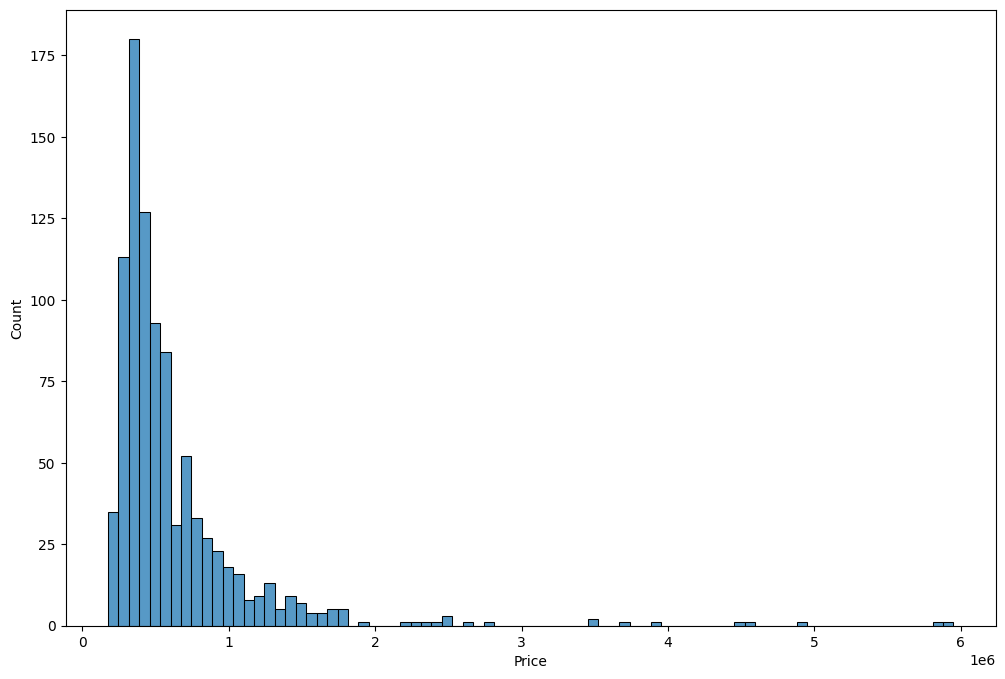

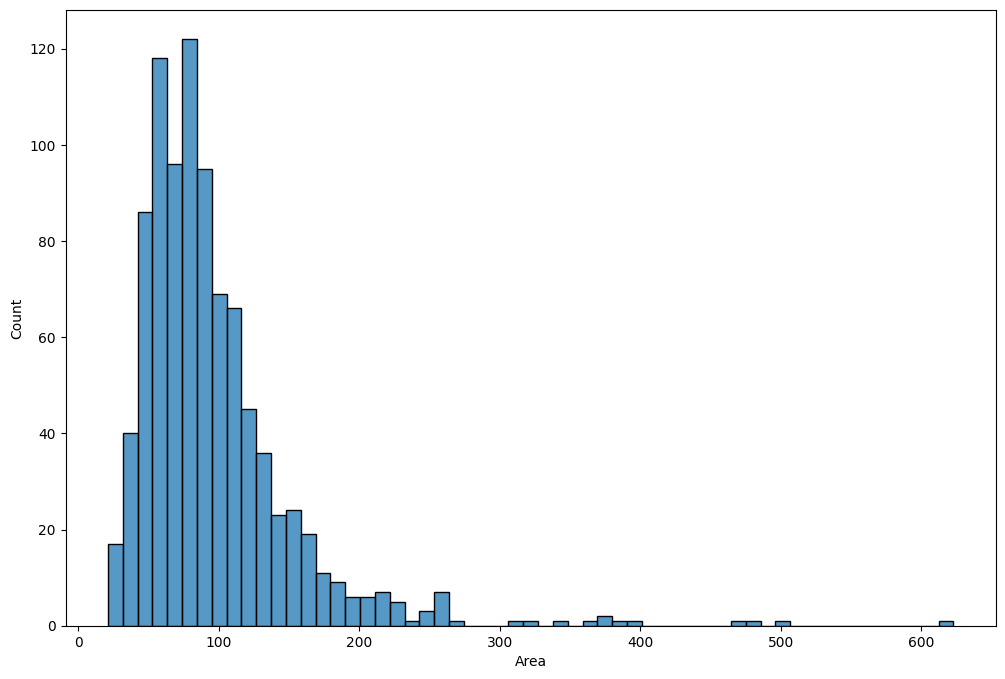

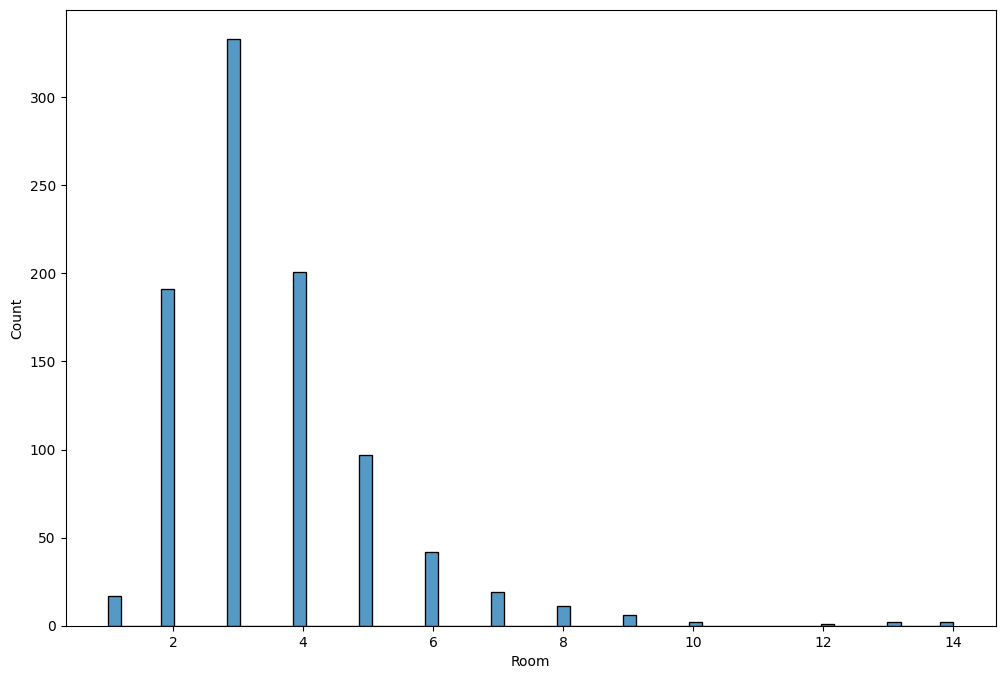

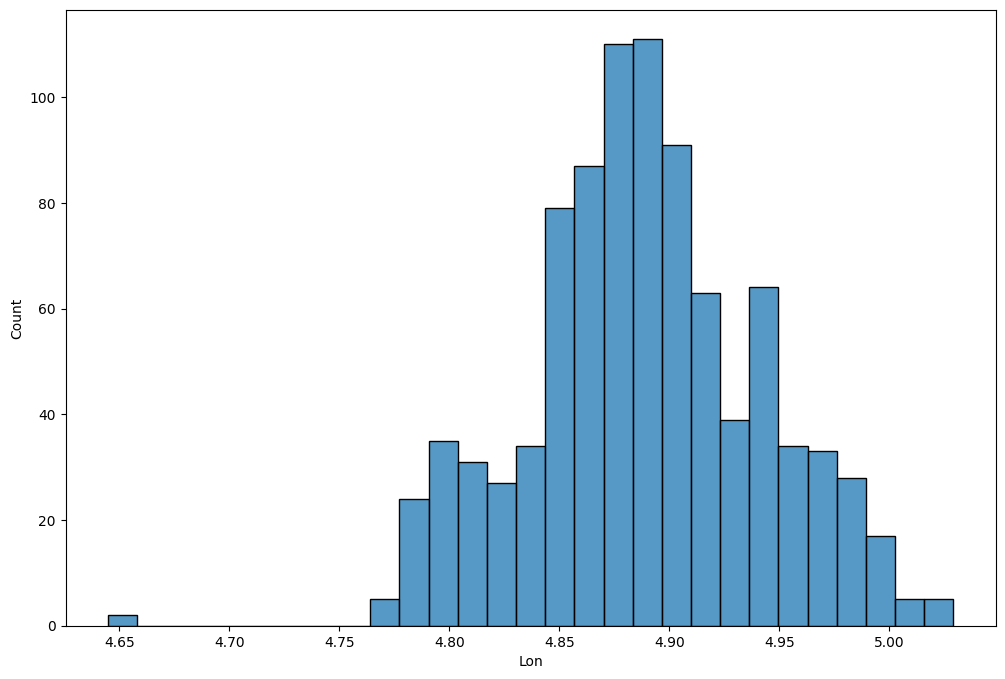

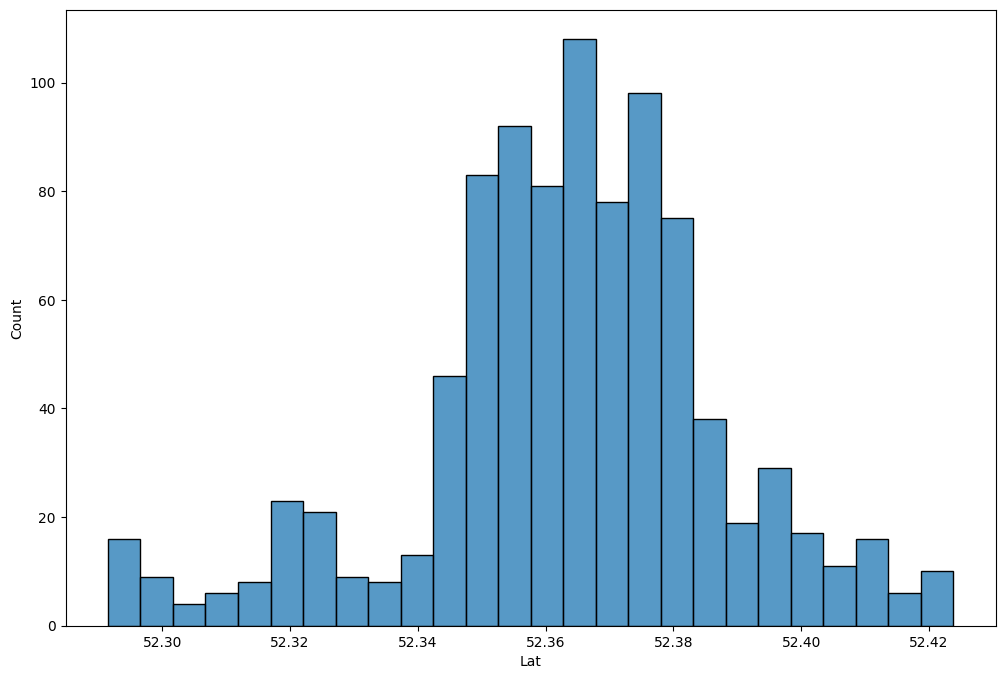

In [7]:
for i in house_price_dataset.columns:
    fig_dims = (12,8)
    fig, ax = plt.subplots(figsize = fig_dims)
    sns.histplot(x=i, data = house_price_dataset)

*We can tell that there are outliers in some of the features - we might want to remove those outliers. Let's decide later on and look at the correlation of the features first.*

**Correlation of features**


*Let's do a heatmap to see the correlation between these features.*

<Axes: >

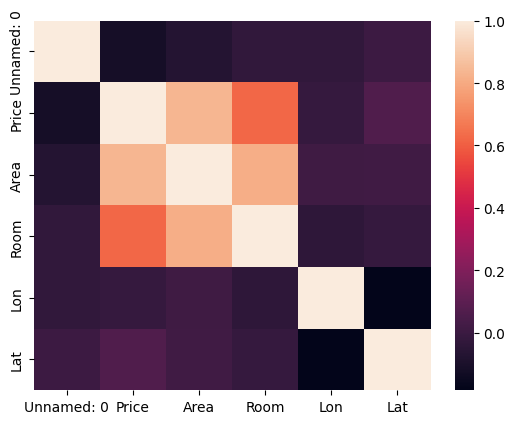

In [8]:
sns.heatmap(house_price_dataset.corr())

*We can tell that there is a strong correlation between the price and area of the house itself, and a slightly weaker (but still strong) correlation between the price and rooms features and the price and area features. Aight, let's start the data cleaning and feature engineering stages*

**Data Cleaning**                                                                     
Let's start off with looking at if there is any missing data.

In [9]:
house_price_dataset.info()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  924 non-null    int64  
 1   Address     924 non-null    object 
 2   Zip         924 non-null    object 
 3   Price       920 non-null    float64
 4   Area        924 non-null    int64  
 5   Room        924 non-null    int64  
 6   Lon         924 non-null    float64
 7   Lat         924 non-null    float64
dtypes: float64(3), int64(3), object(2)
memory usage: 57.9+ KB


*There are missing data points - mainly in the price column. I wouldn't necessarily fill in the prices as it is the metric we are predicting, therefore we will be removing the rows with no price instead*

In [10]:
house_price_dataset = house_price_dataset.dropna(axis = 0, inplace = False)

In [11]:
house_price_dataset.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 920 entries, 0 to 923
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  920 non-null    int64  
 1   Address     920 non-null    object 
 2   Zip         920 non-null    object 
 3   Price       920 non-null    float64
 4   Area        920 non-null    int64  
 5   Room        920 non-null    int64  
 6   Lon         920 non-null    float64
 7   Lat         920 non-null    float64
dtypes: float64(3), int64(3), object(2)
memory usage: 64.7+ KB


*Great! We now have a complete dataset. However, if you remember, we were looking at the outliers and considering removing it. Let's take a look at the boxplot first before we decide on anything!*


<Axes: xlabel='Price'>

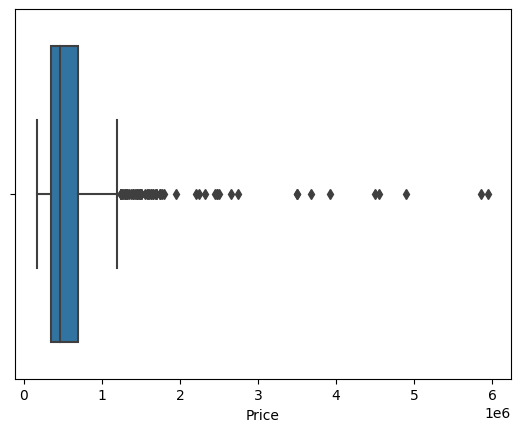

In [12]:
sns.boxplot(x='Price', data =house_price_dataset )

*There are a lot of outliers in this dataset. I would remove most of these data points to have a more accurate regression, but just for fun, let's see how much of the dataset we're removing.*

In [13]:
house_price_dataset .describe()

,Unnamed: 0,Price,Area,Room,Lon,Lat
count,920.000000,9.200000e+02,920.000000,920.00000,920.000000,920.000000
mean,462.625000,6.220654e+05,95.607609,3.56413,4.888652,52.363271
std,266.924298,5.389942e+05,56.849699,1.57103,0.053118,0.024054
min,1.000000,1.750000e+05,21.000000,1.00000,4.644819,52.291519
25%,231.750000,3.500000e+05,60.000000,3.00000,4.855834,52.351925
50%,462.500000,4.670000e+05,83.000000,3.00000,4.886818,52.364499
75%,693.250000,7.000000e+05,113.000000,4.00000,4.922337,52.377545
max,924.000000,5.950000e+06,623.000000,14.00000,5.029122,52.423805


In [14]:
q1 = house_price_dataset.describe()['Price']['25%']
q3 = house_price_dataset.describe()['Price']['75%']
iqr = q3 - q1
max_price = q3 + 1.5 * iqr

In [15]:
outliers = house_price_dataset[house_price_dataset['Price'] >= max_price]
outliers_count = outliers['Price'].count()
house_price_dataset_count = house_price_dataset['Price'].count()
print('Percentage removed: ' + str(round(outliers_count/house_price_dataset_count * 100, 2)) + '%')


Percentage removed: 7.72%


*To be honest, that's a small chunk of data being removed. However, since linear regressions are rather sensitive to outliers, it is best that we remove those. However, if we had more info about housing with the prices close to the outliers, we would definitely be able to train the model better.*

In [16]:
house_price_dataset[ house_price_dataset['Price'] <= max_price]

,Unnamed: 0,Address,Zip,Price,Area,Room,Lon,Lat
0,1,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
1,2,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
2,3,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
3,4,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
4,5,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538
...,...,...,...,...,...,...,...,...
919,920,"Ringdijk, Amsterdam",1097 AE,750000.0,117,1,4.927757,52.354173
920,921,"Kleine Beerstraat 31, Amsterdam",1033 CP,350000.0,72,3,4.890612,52.414587
921,922,"Stuyvesantstraat 33 II, Amsterdam",1058 AK,350000.0,51,3,4.856935,52.363256
922,923,"John Blankensteinstraat 51, Amsterdam",1095 MB,599000.0,113,4,4.965731,52.375268


<Axes: xlabel='Price'>

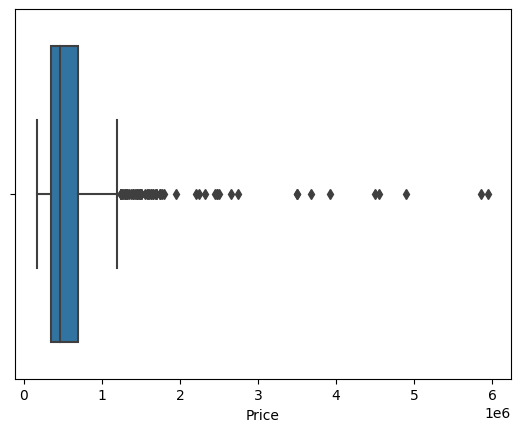

In [17]:
sns.boxplot(x='Price', data =  house_price_dataset)

**Feature Engineering**


*From the data analysis above, you can tell that there are only 5 features, so we definitely need to do some feature engineering to create more features, which is important for training the model*.

In [18]:
house_price_dataset['Zip No'] = house_price_dataset['Zip'].apply(lambda x:x.split()[0])
house_price_dataset['Letters'] = house_price_dataset['Zip'].apply(lambda x:x.split()[-1])

*If we look at the Zip column, we realise that there are 4 digits in the front, and 2 letters at the back. We can split it such that we get 2 new features from the Zip column.*

In [19]:
house_price_dataset['Address']

0                Blasiusstraat 8 2, Amsterdam
1      Kromme Leimuidenstraat 13 H, Amsterdam
2                  Zaaiersweg 11 A, Amsterdam
3                Tenerifestraat 40, Amsterdam
4                  Winterjanpad 21, Amsterdam
                        ...                  
919                       Ringdijk, Amsterdam
920           Kleine Beerstraat 31, Amsterdam
921         Stuyvesantstraat 33 II, Amsterdam
922     John Blankensteinstraat 51, Amsterdam
923        S. F. van Ossstraat 334, Amsterdam
Name: Address, Length: 920, dtype: object

In [20]:
house_price_dataset['Address'] = house_price_dataset['Address'].apply(lambda x:x.split(',')[0])

*This is definitely not enough as the addresses are too varied. I decided that I will take the street of the address itself as a feature instead. However, the separation is more complicated than it seems, so I have created a function that allows me to extract the street name from the address itself.*

In [21]:
def word_separator(string):
    list = string.split()
    word = []
    number = []
    for element in list:
        if element.isalpha() == True:
            word.append(element)
        else:
            break
    word = ' '.join(word)
    return word

In [22]:
house_price_dataset['Street'] = house_price_dataset['Address'].apply(lambda x:word_separator(x))

In [23]:
house_price_dataset.head()

,Unnamed: 0,Address,Zip,Price,Area,Room,Lon,Lat,Zip No,Letters,Street
0,1,Blasiusstraat 8 2,1091 CR,685000.0,64,3,4.907736,52.356157,1091,CR,Blasiusstraat
1,2,Kromme Leimuidenstraat 13 H,1059 EL,475000.0,60,3,4.850476,52.348586,1059,EL,Kromme Leimuidenstraat
2,3,Zaaiersweg 11 A,1097 SM,850000.0,109,4,4.944774,52.343782,1097,SM,Zaaiersweg
3,4,Tenerifestraat 40,1060 TH,580000.0,128,6,4.789928,52.343712,1060,TH,Tenerifestraat
4,5,Winterjanpad 21,1036 KN,720000.0,138,5,4.902503,52.410538,1036,KN,Winterjanpad


*Further Feature Engineering and Data Processing
We split the features into numerical and categorical features so that we are able to convert the categorical features into numerical ones, before training the model with it*

In [24]:
numerical = ['Price', 'Area', 'Room', 'Lon', 'Lat']
categorical = ['Address', 'Zip No', 'Letters', 'Street']

**There are a few encoders that I considered using:**

**Label Encoding**

**One Hot Encoding**

**Ordinal Encoding**

One Hot Encoding would not be effective if there were too many features and Ordinal Encoding would be useful if you had to preserve some order ofcategorical data but useless otherwise. Therefore, Label Encoding would be the best choice here.

In [25]:
from sklearn.preprocessing import LabelEncoder
for c in categorical:
    lbl = LabelEncoder()
    lbl.fit(list(house_price_dataset[c].values))
    house_price_dataset[c] = lbl.transform(list(house_price_dataset[c].values))

In [26]:
house_price_dataset.drop(['Zip', 'Unnamed: 0', 'Address'], axis =1, inplace = True)

<Axes: >

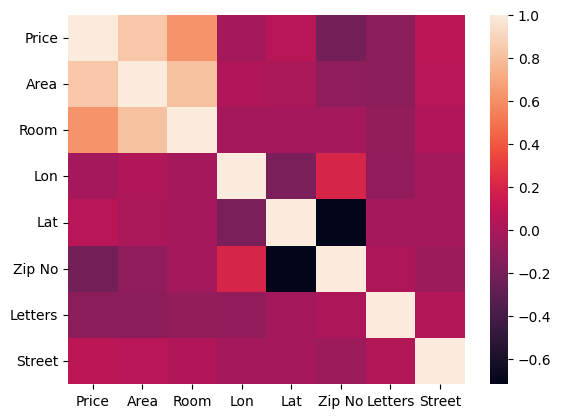

In [27]:
sns.heatmap(house_price_dataset.corr())

**Train Test Split**                                                     
*We will split the dataset into two datasets, the train dataset and the test dataset. We will then use cross-validation with negative mean squared error as the scoring feature. We will then make the value positive and square root it to derive the Root Mean Squared Error, which is smaller.*

In [28]:
from sklearn.model_selection import train_test_split
X = house_price_dataset.drop('Price', axis =1)
y = house_price_dataset['Price']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4)

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Linear Regression Cross Validation**

In [30]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
predictions = linreg.predict(X_test)

In [31]:
cv = cross_val_score(linreg, X_train, y_train, cv=20, scoring = 'neg_mean_squared_error')
print(cv)
print(abs(cv.mean())**0.5)

[-5.40555156e+10 -9.52506824e+10 -5.64485690e+10 -4.43752255e+10
 -3.34503830e+11 -4.88912329e+10 -4.01680360e+10 -2.53884497e+10
 -4.12818472e+10 -3.86789017e+10 -2.36912643e+10 -3.85338343e+10
 -1.25971794e+11 -4.63086335e+10 -5.57820836e+10 -6.06906991e+10
 -3.73133267e+11 -4.13484829e+10 -2.20432341e+10 -4.35679922e+10]
283735.2264961457


**Lasso Regression Cross Validation**

*Lasso regression is a type of regression that only uses L1 regularisation.*

In [32]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train, y_train)
predictions = lasso.predict(X_test)

In [33]:
cv = cross_val_score(lasso, X_train, y_train, cv=20, scoring = 'neg_mean_squared_error')
print(cv)
print(abs(cv.mean())**0.5)

[-5.40545491e+10 -9.52509012e+10 -5.64479457e+10 -4.43751834e+10
 -3.34504832e+11 -4.88923341e+10 -4.01685037e+10 -2.53883508e+10
 -4.12820670e+10 -3.86783939e+10 -2.36915239e+10 -3.85333027e+10
 -1.25968193e+11 -4.63092042e+10 -5.57825891e+10 -6.06895873e+10
 -3.73134858e+11 -4.13475926e+10 -2.20428027e+10 -4.35680533e+10]
283734.9791380668


**Elastic Net Regression Cross Validation**

*Elastic Net Regression is a type of regression that uses a ratio of L1 and L2 regularisation.*

In [34]:
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet()
elasticnet.fit(X_train, y_train)
predictions = elasticnet.predict(X_test)


In [35]:
cv = cross_val_score(elasticnet, X_train, y_train, cv=20, scoring = 'neg_mean_squared_error')
print(cv)
print(abs(cv.mean())**0.5)

[-5.09913972e+10 -1.50176965e+11 -6.08943465e+10 -4.36729703e+10
 -5.29137797e+11 -1.30473510e+11 -9.77543989e+10 -1.21100564e+10
 -4.06472462e+10 -4.25947993e+10 -3.40165340e+10 -2.98482561e+10
 -1.01356145e+11 -4.45083576e+10 -6.39432447e+10 -2.80654302e+10
 -5.28207518e+11 -3.69291807e+10 -2.28784543e+10 -4.39652702e+10]
323432.51827816415


**Ridge Regression Cross Validation**

*Lasso regression is a type of regression that only uses L2 regularisation.*

In [36]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train, y_train)
predictions = ridge.predict(X_test)

In [37]:
cv = cross_val_score(ridge, X_train, y_train, cv=20, scoring = 'neg_mean_squared_error')
print(cv)
print(abs(cv.mean())**0.5)

[-5.39813344e+10 -9.56005442e+10 -5.62992011e+10 -4.42689907e+10
 -3.35629716e+11 -4.94865233e+10 -4.05174142e+10 -2.51181576e+10
 -4.12281005e+10 -3.85450452e+10 -2.38016445e+10 -3.83658546e+10
 -1.23455410e+11 -4.62547727e+10 -5.59745208e+10 -6.00925891e+10
 -3.74039801e+11 -4.09492352e+10 -2.19262379e+10 -4.35596007e+10]
283645.4383362273


**Random Forest Cross Validation**

*For this case, we'll be using Random Forest regression as it is a regression task.*

In [38]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)
predictions = random_forest.predict(X_test)

In [39]:
cv = cross_val_score(random_forest, X_train, y_train, cv=20, scoring = 'neg_mean_squared_error')
print(cv)
print(abs(cv.mean())**0.5)

[-1.52927813e+10 -2.13635013e+10 -6.30771218e+10 -1.69933329e+10
 -2.46841938e+11 -3.38061378e+10 -5.03924197e+09 -5.82547543e+09
 -1.62072915e+10 -4.94502126e+10 -1.77256932e+10 -1.20457615e+10
 -3.43447318e+10 -2.21551198e+10 -2.70513836e+10 -2.09745245e+10
 -3.24952953e+11 -3.19374819e+10 -1.27784001e+10 -2.14833364e+10]
223533.71333811237


**XGBoost Cross Validation**

In [40]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
predictions = xgb.predict(X_test)

In [41]:
cv = cross_val_score(xgb, X_train, y_train, cv=20, scoring = 'neg_mean_squared_error')
print(cv)
print(abs(cv.mean())**0.5)

[-9.05353767e+09 -5.47928359e+10 -4.77914767e+10 -2.64617267e+10
 -8.81048936e+10 -2.63432386e+10 -5.80679055e+09 -8.09583990e+09
 -1.93266176e+10 -3.38446820e+10 -1.60950426e+10 -1.64039682e+10
 -5.61253765e+10 -1.77411594e+10 -2.07347733e+10 -1.72819051e+10
 -4.63883044e+11 -2.58966956e+10 -1.50100750e+10 -2.41281629e+10]
222814.03027384568
